# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from IPython.display import display

# Importing and Combining Data

In [2]:
# Define column names for adult.data and load data
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
a_data = pd.read_csv('adult.data', names = columns, na_values = ' ?', skipinitialspace = True,)

# Load adult.test
a_test = pd.read_csv('adult.test', names = columns, na_values = ' ?', skipinitialspace = True, skiprows = 1)

# Removing '.' from income column
a_test.loc[:, 'income'] = a_test['income'].replace(regex=True, to_replace=r'\.', value=r'')

# Combining datasets
combined_data = pd.concat([a_data, a_test], axis = 0)
combined_data.reset_index(drop = True, inplace = True)

display(combined_data.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Class Distribution

In [3]:
# Count class labels
class_counts = combined_data['income'].value_counts()

# Display class counts
print(class_counts)

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


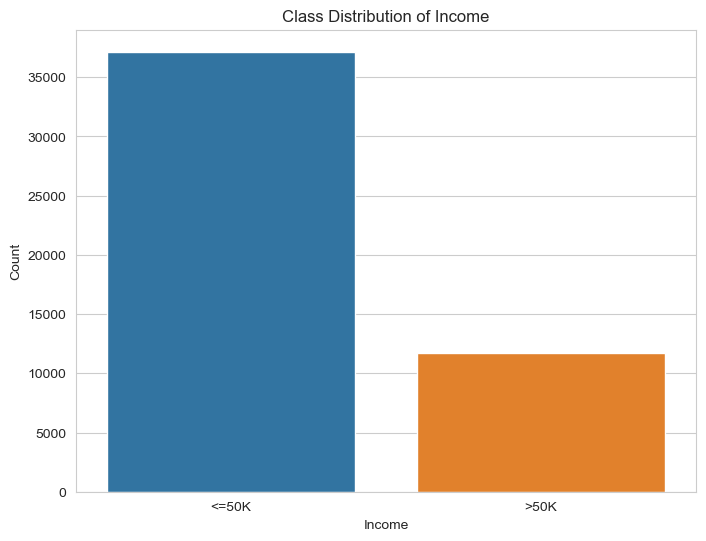

In [4]:
# Plotting the distribution
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=combined_data, x='income')
plt.title('Class Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# Preprocessing

In [5]:
# Checking for duplicates
count_duplicates = combined_data.duplicated().sum()

# Dropping duplicates
clean_data = combined_data.drop_duplicates()

# Checking for missing value
null = clean_data.isin(['?']).any(axis =1)
count_null = null.sum()

null_vals = clean_data[~null]
clean_data_v2 = null_vals.dropna().reset_index(drop = True)

#### Report on preprocessing

In [6]:
print("Number of rows before preprocessing : ", len(combined_data))
print("Number of duplicates : ", count_duplicates)
print("Number of nulls : ", count_null)
print("Number of rows after preprocessing", len(clean_data_v2))

Number of rows before preprocessing :  48842
Number of duplicates :  52
Number of nulls :  3615
Number of rows after preprocessing 45175


#### Summary of the Dataset

In [7]:
# Summary for numerical columns
numerical_summary = clean_data_v2.describe()
print("Statistical summary for numerical data : ")
display(numerical_summary)

# Summary for categorical columns
categorical_summary = clean_data_v2.describe(include = 'object')
print("\nStatistical summary for categorical data : ")
display(categorical_summary)

Statistical summary for numerical data : 


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000



Statistical summary for categorical data : 


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,45175,45175,45175,45175,45175,45175,45175,45175,45175
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33262,14770,21042,6010,18653,38859,30495,41256,33973


#### Histogram for numerical features

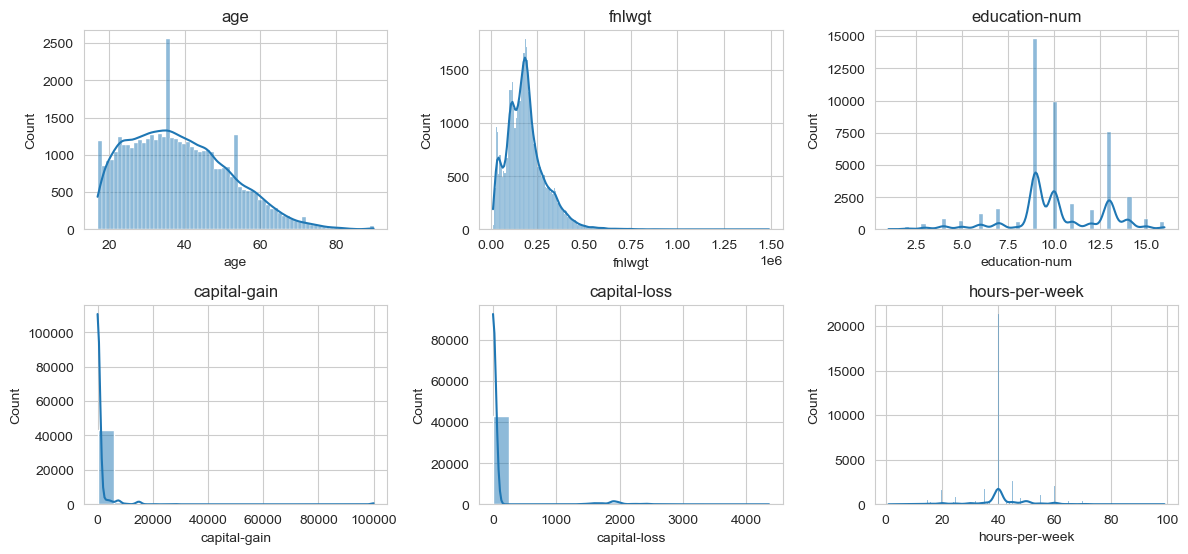

In [8]:
# Select numerical features
numerical_features = clean_data_v2.select_dtypes(include = ['int64', 'float64'])

# Plot histogram
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(clean_data_v2[column], kde = True)
    plt.title(column)
plt.tight_layout()
plt.show()

#### Histograms for each column by income

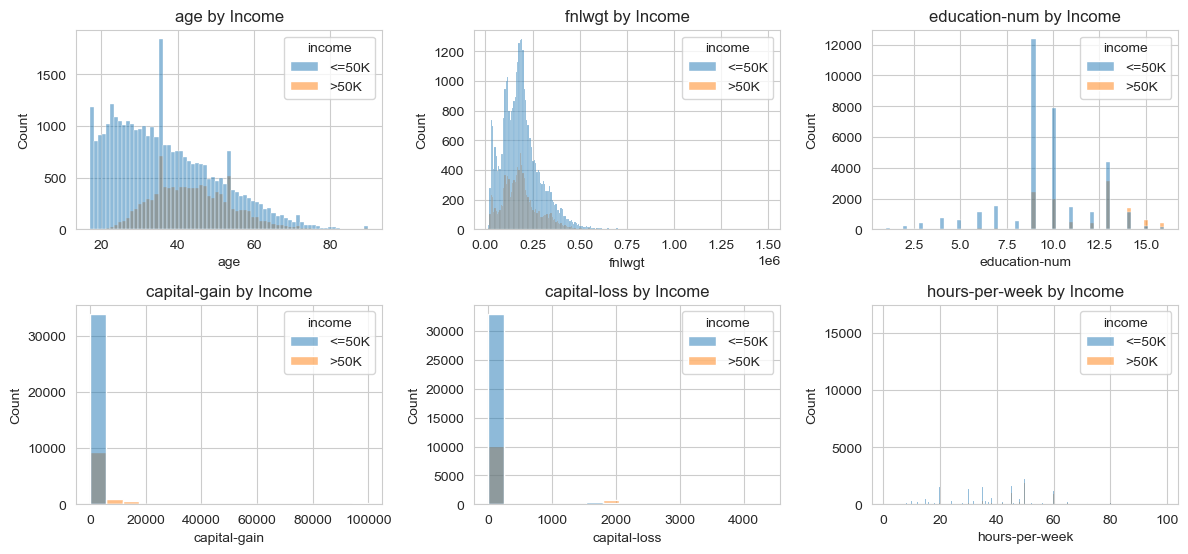

In [9]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_features.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=clean_data_v2, x=column, hue='income', kde=False)
    plt.title(f'{column} by Income')
plt.tight_layout()
plt.show()

#### Kernel density plot for numerical features

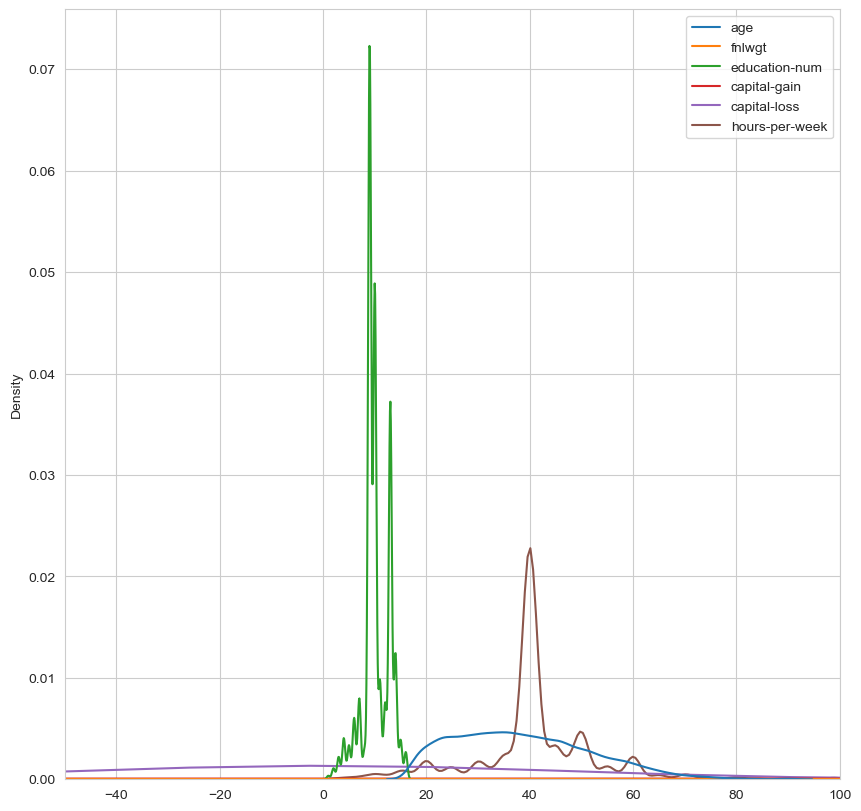

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.kdeplot(data = clean_data_v2, ax = ax)
ax.set_xlim(-50, 100)

plt.show()

#### Finding the Mean and the Standard Deviation of the columns

In [11]:
# Calculate mean and standard deviation
mean_of_data = numerical_features.mean()
sd_of_data = numerical_features.std()

# Display mean and standard deviation
for column in numerical_features.columns:
    print(f"Column : {column}")
    print(f"Mean : {mean_of_data[column]}")
    print(f"Standard Deviation : {sd_of_data[column]}\n")

Column : age
Mean : 38.55617044825678
Standard Deviation : 13.215348745135742

Column : fnlwgt
Mean : 189738.7984504704
Standard Deviation : 105652.4365145079

Column : education-num
Mean : 10.119313779745434
Standard Deviation : 2.55173979562434

Column : capital-gain
Mean : 1102.5762700608743
Standard Deviation : 7510.249876283428

Column : capital-loss
Mean : 88.68759269507471
Standard Deviation : 405.15661133604317

Column : hours-per-week
Mean : 40.9425124515772
Standard Deviation : 12.007730299644342



# Using Standard Scaler on the numerical features

In [12]:
scaler = StandardScaler()

# Fit scaler to the numerical features and transform them
numerical_scaled = scaler.fit_transform(numerical_features)

# Convert the scaled numerical features back into a data frame
scaled_df = pd.DataFrame(numerical_scaled, columns = numerical_features.columns)

# Reset index to ensure the index is continuos
clean_data_v2.reset_index(drop=True, inplace=True)

# Combine scaled numerical features with non numeric features
scaled_combined = pd.concat([scaled_df, clean_data_v2.select_dtypes(exclude = ['int64', 'float64'])], axis =1)

# Display DataFrame
display(scaled_combined.head())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,0.033585,-1.062200,1.128923,0.142663,-0.218899,-0.078493,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,0.865959,-1.007350,1.128923,-0.146811,-0.218899,-2.327069,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,-0.042086,0.245214,-0.438652,-0.146811,-0.218899,-0.078493,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,1.092971,0.425761,-1.222440,-0.146811,-0.218899,-0.078493,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,-0.798790,1.407179,1.128923,-0.146811,-0.218899,-0.078493,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


#### Finding the Mean and the Standard Deviation of the Scaled data

In [13]:
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Calculate mean and standard deviation of scaled data
scaled_mean = scaled_combined[numerical_columns].mean()
scaled_sd = scaled_combined[numerical_columns].std()

# Display mean and standard deviation of scaled data
for column in numerical_columns:
    print(f"Column : {column}")
    print(f"Mean : {scaled_mean[column]}")
    print(f"Standard Deviation : {scaled_sd[column]}\n")

Column : age
Mean : 1.5099524655887022e-17
Standard Deviation : 1.0000110682523495

Column : fnlwgt
Mean : -1.4108618350344435e-16
Standard Deviation : 1.0000110682523766

Column : education-num
Mean : -2.8783468875284634e-17
Standard Deviation : 1.0000110682524472

Column : capital-gain
Mean : -5.347748315626653e-18
Standard Deviation : 1.0000110682525345

Column : capital-loss
Mean : 1.1324643491915265e-17
Standard Deviation : 1.000011068252664

Column : hours-per-week
Mean : -9.201272837181153e-17
Standard Deviation : 1.0000110682522045



# Encoding Categorical Features

In [14]:
X = scaled_combined.drop('income', axis = 1)
y = scaled_combined['income']

# Select categorical features
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

categorical_X = pd.get_dummies(X[categorical_columns], drop_first=True)

# Concatenate one-hot encoded features with the numeric features
encoded = pd.concat([X.drop(categorical_columns, axis=1), categorical_X], axis=1)

X_train, X_test, y_train, y_test = train_test_split(encoded, y, test_size = 0.2, random_state = 42)

sampler = SMOTEENN(random_state = 42)

X_sampled, y_sampled = sampler.fit_resample(X_train, y_train)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_sampled.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_sampled.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (40381, 96)
Shape of X_test: (9035, 96)
Shape of y_train: (40381,)
Shape of y_test: (9035,)


In [15]:
naive_bayes_classifier = GaussianNB()

naive_bayes_classifier.fit(X_sampled, y_sampled)

y_pred = naive_bayes_classifier.predict(X_test)

In [16]:
print("Accuracy : ", accuracy_score(y_test, y_pred))

class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy :  0.6527946873270615
              precision    recall  f1-score   support

       <=50K       0.96      0.56      0.71      6830
        >50K       0.41      0.93      0.57      2205

    accuracy                           0.65      9035
   macro avg       0.69      0.75      0.64      9035
weighted avg       0.83      0.65      0.68      9035



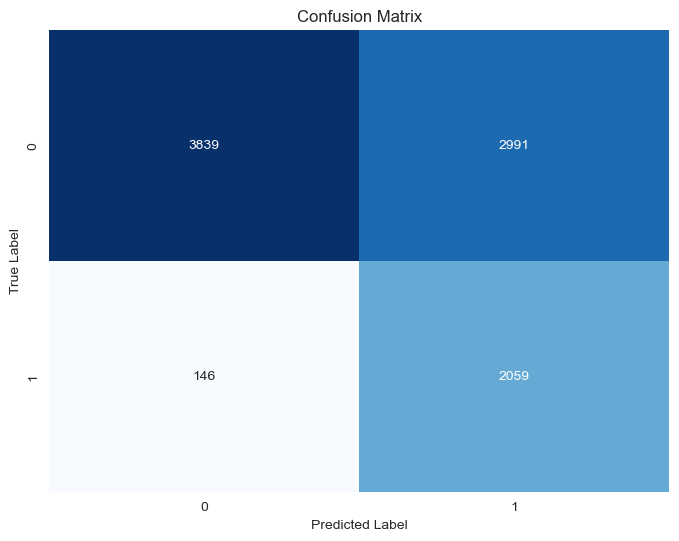

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()